## Fawkes target variance

*Cells not run in order, do not re-run for duplication

In [2]:
import numpy as np
import pandas as pd
import pickle as pkl
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from keras_vggface.utils import decode_predictions

In [3]:
with open('./image_embed.pkl', 'rb') as f:
    image_embed = pkl.load(f)

In [4]:
with open('./image_dict.pkl', 'rb') as f:
    image_dict = pkl.load(f)

In [5]:
image_dict.keys()

dict_keys(['mindy_kaling', 'jerry_seinfeld', 'ben_afflek', 'elton_john', 'madonna'])

In [45]:
actor = 'mindy_kaling'
_id = "b'Mindy_Kaling'"

In [120]:
face_cloaked = [i[:-4] + '_cloaked.jpeg' for i in image_dict[actor]]
predictions_cloaked = [decode_predictions(image_embed[i])[0][0] for i in face_cloaked]

correct_preds = [0 for _ in range(len(predictions_cloaked))]
for i in range(len(predictions_cloaked)):
    if predictions_cloaked[i][0] == _id:
        correct_preds[i] = 1

predictions_cloaked

[["b'Mindy_Kaling'", 0.15071206],
 ["b'Mercedes_Ruehl'", 0.19137204],
 ["b'Virginie_Ledoyen'", 0.02232925],
 ["b'Leonor_Varela'", 0.2902778],
 ["b'Mindy_Kaling'", 0.9150362],
 ["b'Jessie_J'", 0.096710235],
 ["b'Branka_Katic'", 0.104401395],
 ["b'Mindy_Kaling'", 0.9259999],
 ["b'Dawna_Lee_Heising'", 0.079223365],
 ["b'Mindy_Kaling'", 0.6443156],
 ["b'Shohreh_Aghdashloo'", 0.059288196],
 ["b'Marisol_Nichols'", 0.06220526],
 ["b'Vidya_Balan'", 0.062225014],
 ["b'Sherri_Saum'", 0.13305317],
 ["b'Mindy_Kaling'", 0.22079475],
 ["b'Farrah_Abraham'", 0.4439012],
 ["b'Heather_Tom'", 0.07456778],
 ["b'Callie_Thorne'", 0.0841517],
 ["b'Veronica_Ferres'", 0.63967574],
 ["b'Candice_Swanepoel'", 0.17047052],
 ["b'Kylie_Minogue'", 0.2201086],
 ["b'Susan_Blakely'", 0.06770218],
 ["b'Karoline_Herfurth'", 0.20039627],
 ["b'Daniela_Ruah'", 0.22851975],
 ["b'Vanessa_Lachey'", 0.34742123],
 ["b'Adriana_Barraza'", 0.39074728],
 ["b'Mindy_Kaling'", 0.9267435]]

In [108]:
face = image_dict[actor]
predictions = [decode_predictions(image_embed[i])[0][0] for i in face]
predictions

# Comment out if not running pca for cloaked
correct_preds = [0 for _ in range(len(predictions))]
for i in range(len(predictions)):
    if predictions[i][0] == _id:
        correct_preds[i] = 1

predictions

[["b'Mindy_Kaling'", 0.928031],
 ["b'Mercedes_Ruehl'", 0.14017145],
 ["b'Virginie_Ledoyen'", 0.028823102],
 ["b'Mindy_Kaling'", 0.96284455],
 ["b'Mindy_Kaling'", 0.9938107],
 ["b'Mindy_Kaling'", 0.4185429],
 ["b'Branka_Katic'", 0.07857431],
 ["b'Mindy_Kaling'", 0.9577685],
 ["b'Adriana_Barraza'", 0.1570321],
 ["b'Mindy_Kaling'", 0.992362],
 ["b'Mindy_Kaling'", 0.96357805],
 ["b'Mindy_Kaling'", 0.9737082],
 ["b'Vidya_Balan'", 0.060402002],
 ["b'Mindy_Kaling'", 0.9588317],
 ["b'Mindy_Kaling'", 0.9140493],
 ["b'Mindy_Sterling'", 0.26405418],
 ["b'Mindy_Kaling'", 0.9830357],
 ["b'Mindy_Kaling'", 0.98927003],
 ["b'Mindy_Kaling'", 0.97736007],
 ["b'Jessie_J'", 0.09812361],
 ["b'Alexia_Fast'", 0.041302353],
 ["b'Mindy_Kaling'", 0.98469204],
 ["b'Mindy_Kaling'", 0.9902136],
 ["b'Mindy_Kaling'", 0.36944234],
 ["b'Mindy_Kaling'", 0.86932516],
 ["b'Mindy_Kaling'", 0.9879055],
 ["b'Mindy_Kaling'", 0.9911725]]

In [121]:
def get_cloaked_embeddings(actor):
    face_cloaked = [i[:-4] + '_cloaked.jpeg' for i in image_dict[actor]]
    # Uncomment for uncloaked
    # face_cloaked = image_dict[actor]
    face_cloaked_embeds = np.array([image_embed[i] for i in face_cloaked])
    shape = face_cloaked_embeds.shape
    face_cloaked_embeds = face_cloaked_embeds.reshape((shape[0], -1))
    return face_cloaked_embeds

In [122]:
face_cloaked_embeds = get_cloaked_embeddings(actor)

In [123]:
def get_pca_df(embeds):
    components = 2
    
    pca = PCA(n_components=components)
    pca_df = pd.DataFrame(pca.fit_transform(embeds))
    pca_df.columns = ['PC{}'.format(i) for i in range(1, components+1)]
    return pca_df

In [124]:
pca_df = get_pca_df(face_cloaked_embeds)

In [125]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(face_cloaked_embeds)

In [126]:
pca_df['labels'] = kmeans.labels_
pca_df['correct'] = correct_preds

### Uncloaked PCA and Kmeans

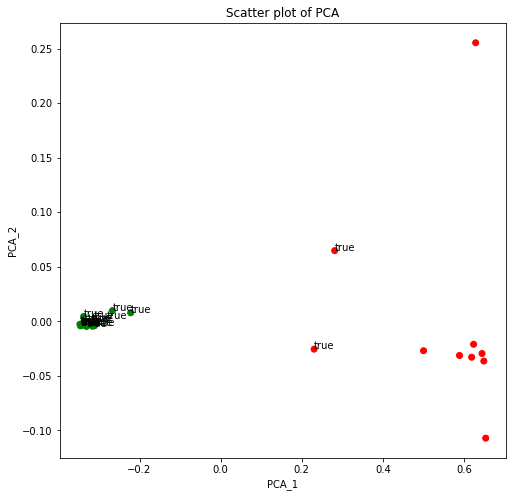

In [119]:
fig, ax = plt.subplots(figsize=(8, 8))

x = pca_df['PC1']
y = pca_df['PC2']
z = pca_df['correct']

colors = ['red', 'blue', 'green']

ax.scatter(x, y, c=pca_df['labels'], cmap=matplotlib.colors.ListedColormap(colors))

for i, txt in enumerate(z):
    if txt == 1:
        ax.annotate(str('true'), (x[i], y[i]))

plt.title('Scatter plot of PCA')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

## Cloaked PCA and Kmeans

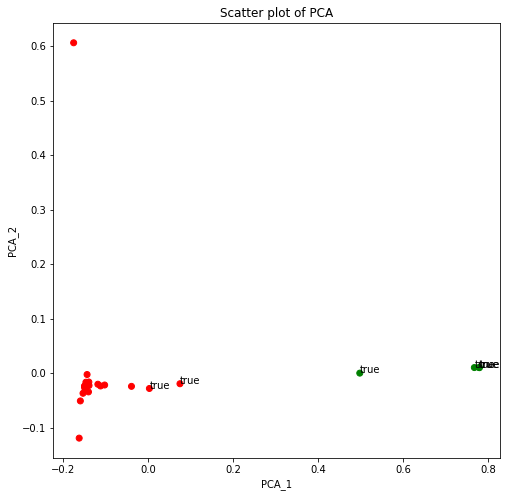

In [128]:

fig, ax = plt.subplots(figsize=(8, 8))

x = pca_df['PC1']
y = pca_df['PC2']
z = pca_df['correct']

colors = ['red', 'blue', 'green']

ax.scatter(x, y, c=pca_df['labels'], cmap=matplotlib.colors.ListedColormap(colors))

for i, txt in enumerate(z):
    if txt == 1:
        ax.annotate(str('true'), (x[i], y[i]))

plt.title('Scatter plot of PCA')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()